# Data

## WRDS: Getting Survivorship Free Data
In any quantitative research involving simulation, a lot can go wrong if we do not use survivorship bias free data. For instance, if we want to test our clustering algorithm on stocks in cluded in the S&P500 for different time periods, then it is important to have access to the membership data for S&P500 for that date. This is in general very difficult to obtain.

Thus, we rely on WRDS, which is a subscription based data vendor used by many academics. 

An easier way to get is to download the historical components [file from this link](https://github.com/fja05680/sp500).


In [4]:
from dotenv import load_dotenv
import os
load_dotenv()

wrds_user = os.getenv("WRDS_USER")
wrds_pw = os.getenv("WRDS_PASSWORD")

In [ ]:
import wrds
conn = wrds.Connection() # make sure to use .close() to close connection (up to 5 connections possible)

WRDS recommends setting up a .pgpass file.
pgpass file created at C:\Users\jayju\AppData\Roaming\postgresql\pgpass.conf
Created .pgpass file successfully.
You can create this file yourself at any time with the create_pgpass_file() function.
Loading library list...
Done


In [8]:
conn.list_libraries().sort()
type(conn.list_libraries())

list

In [15]:
# list datasets from specific lib
conn.list_tables(library='crsp')

['acti',
 'asia',
 'asib',
 'asic',
 'asio',
 'asix',
 'bmdebt',
 'bmheader',
 'bmpaymts',
 'bmquotes',
 'bmyield',
 'bndprt06',
 'bndprt12',
 'bxcalind',
 'bxdlyind',
 'bxmthind',
 'bxquotes',
 'bxyield',
 'cap',
 'ccm_lookup',
 'ccm_qvards',
 'ccmxpf_linktable',
 'ccmxpf_lnkhist',
 'ccmxpf_lnkrng',
 'ccmxpf_lnkused',
 'comphead',
 'comphist',
 'compmaster',
 'contact_info',
 'core',
 'crsp_cik_map',
 'crsp_daily_data',
 'crsp_header',
 'crsp_monthly_data',
 'crsp_names',
 'crsp_portno_map',
 'crsp_ziman_daily_index',
 'crsp_ziman_monthly_index',
 'cs20yr',
 'cs5yr',
 'cs90d',
 'cst_hist',
 'daily_nav',
 'daily_nav_ret',
 'daily_returns',
 'dividends',
 'dport1',
 'dport2',
 'dport3',
 'dport4',
 'dport5',
 'dport6',
 'dport7',
 'dport8',
 'dport9',
 'dsbc',
 'dsbo',
 'dse',
 'dse62',
 'dse62delist',
 'dse62dist',
 'dse62exchdates',
 'dse62names',
 'dse62nasdin',
 'dse62shares',
 'dseall',
 'dseall62',
 'dsedelist',
 'dsedist',
 'dseexchdates',
 'dsenames',
 'dsenasdin',
 'dseshares',

In [10]:
# Extract first 5 obs from comp.company

company = conn.get_table(library='comp', table='company', obs=5)
company.shape

(5, 40)

In [12]:
company

,conm,gvkey,add1,add2,add3,add4,addzip,busdesc,cik,city,...,sic,spcindcd,spcseccd,spcsrc,state,stko,weburl,dldte,ipodate,curr_sp500_flag
0,A & E PLASTIK PAK INC,001000,<NA>,<NA>,<NA>,<NA>,<NA>,A & E Plastik Pak Inc. is a commodity chemical...,<NA>,<NA>,...,3089,325,978,<NA>,<NA>,0,<NA>,1978-06-30,<NA>,0.0
1,A & M FOOD SERVICES INC,001001,1924 South Utica Avenue,<NA>,<NA>,<NA>,94104,<NA>,0000723576,Tulsa,...,5812,420,978,<NA>,OK,0,<NA>,1986-07-31,<NA>,0.0
2,AAI CORP,001002,124 Industry Lane,<NA>,<NA>,<NA>,21030-0126,"Textron Systems Corporation designs, develops,...",0001306124,Hunt Valley,...,3825,230,940,<NA>,MD,0,www.textronsystems.com,1977-03-31,<NA>,0.0
3,A.A. IMPORTING CO INC,001003,7700 Hall Street,<NA>,<NA>,<NA>,63125,"A.A. Importing Company, Inc. designs, manufact...",0000730052,St. Louis,...,5712,449,976,<NA>,MO,3,www.aaimporting.com,1992-04-30,<NA>,0.0
4,AAR CORP,001004,"One AAR Place, 1100 North Wood Dale Road",<NA>,<NA>,<NA>,60191,AAR Corp. provides products and services to co...,0000001750,Wood Dale,...,5080,110,925,B,IL,0,www.aarcorp.com,<NA>,1972-04-24,0.0


In [13]:
# Select one stock's monthly price
# from 2019 onwards

apple = conn.raw_sql("""select permno, date, prc, ret, shrout 
                        from crsp.msf 
                        where permno = 14593
                        and date>='01/01/2019'""", 
                     date_cols=['date'])
apple

,permno,date,prc,ret,shrout
0,14593,2019-01-31,166.44,0.055154,4715280.0
1,14593,2019-02-28,173.14999,0.044701,4715280.0
2,14593,2019-03-29,189.95,0.097026,4715280.0
3,14593,2019-04-30,200.67,0.056436,4601075.0
4,14593,2019-05-31,175.07001,-0.123735,4601075.0
...,...,...,...,...,...
67,14593,2024-08-30,229.0,0.032286,15204137.0
68,14593,2024-09-30,233.0,0.017467,15116786.0
69,14593,2024-10-31,225.91,-0.030429,15115823.0
70,14593,2024-11-29,237.33,0.051658,15115823.0


In [16]:
# Get membership data for SP500
sp500 = conn.raw_sql("""
                        select a.*, b.date, b.ret
                        from crsp.msp500list as a,
                        crsp.msf as b
                        where a.permno=b.permno
                        and b.date >= a.start and b.date<= a.ending
                        and b.date>='01/01/2000'
                        order by date;
                        """, date_cols=['start', 'ending', 'date'])

In [21]:
sp500.query("permno == 21792")

C:\Users\jayju\AppData\Local\Temp\ipykernel_115540\3028850115.py:1: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  sp500.query("permno == 21792")


,permno,start,ending,date,ret
0,21792,1985-07-25,2024-12-31,2000-01-31,-0.002732
738,21792,1985-07-25,2024-12-31,2000-02-29,-0.082192
1133,21792,1985-07-25,2024-12-31,2000-03-31,0.145897
1827,21792,1985-07-25,2024-12-31,2000-04-28,0.129973
2471,21792,1985-07-25,2024-12-31,2000-05-31,0.086855
...,...,...,...,...,...
148038,21792,1985-07-25,2024-12-31,2024-08-30,-0.009009
148703,21792,1985-07-25,2024-12-31,2024-09-30,0.077656
149153,21792,1985-07-25,2024-12-31,2024-10-31,0.003739
149811,21792,1985-07-25,2024-12-31,2024-11-29,0.111751


In [32]:
sp500

,permno,start,ending,date,ret
0,21792,1985-07-25,2024-12-31,2000-01-31,-0.002732
1,41355,1985-11-07,2024-12-31,2000-01-31,-0.157125
2,50032,1984-11-23,NaT,2000-01-31,-0.048682
3,10147,1996-03-28,NaT,2000-01-31,-0.025172
4,88388,1998-06-15,NaT,2000-01-31,0.034988
...,...,...,...,...,...
150519,65402,2017-07-26,2024-12-31,2024-12-31,-0.084307
150520,18428,2019-04-02,2024-12-31,2024-12-31,-0.092287
150521,91233,2008-07-18,2024-12-31,2024-12-31,-0.011953
150522,47896,1976-07-01,2024-12-31,2024-12-31,-0.040085


In [23]:
# Add Other Descriptive Variables
import pandas as pd
mse = conn.raw_sql("""
                        select comnam, ncusip, namedt, nameendt, 
                        permno, shrcd, exchcd, hsiccd, ticker
                        from crsp.msenames
                        """, date_cols=['namedt', 'nameendt'])

# if nameendt is missing then set to today date
mse['nameendt']=mse['nameendt'].fillna(pd.to_datetime('today'))
mse.head()

,comnam,ncusip,namedt,nameendt,permno,shrcd,exchcd,hsiccd,ticker
0,OPTIMUM MANUFACTURING INC,68391610,1986-01-07,1986-12-03 00:00:00.000000,10000,10,3,3990,OMFGA
1,OPTIMUM MANUFACTURING INC,68391610,1986-12-04,2025-10-09 00:17:31.274400,10000,10,3,3990,OMFGA
2,OPTIMUM MANUFACTURING INC,68391610,1987-03-10,2025-10-09 00:17:31.274400,10000,10,3,3990,OMFGA
3,GREAT FALLS GAS CO,39040610,1986-01-09,1993-11-21 00:00:00.000000,10001,11,3,4925,GFGC
4,ENERGY WEST INC,29274A10,1993-11-22,2025-10-09 00:17:31.274400,10001,11,3,4925,EWST


In [25]:
# Merge with SP500 data
sp500_full = pd.merge(sp500, mse, how = 'left', on = 'permno')

# Impose the date range restrictions
sp500_full = sp500_full.loc[(sp500_full.date>=sp500_full.namedt) \
                            & (sp500_full.date<=sp500_full.nameendt)]
sp500_full.sample(5)

,permno,start,ending,date,ret,comnam,ncusip,namedt,nameendt,shrcd,exchcd,hsiccd,ticker
417227,28222,1985-04-11,2024-12-31,2008-12-31,0.061767,AIR PRODUCTS & CHEMICALS INC,<NA>,1961-11-13,2025-10-09 00:17:31.274400,11,1,2842,<NA>
419924,51263,2007-11-16,NaT,2009-01-30,-0.364896,MANITOWOC CO INC,56357110,2006-07-27,2025-10-09 00:17:31.274400,11,1,3537,MTW
1078707,77730,2005-08-11,2024-12-31,2023-07-31,0.091693,TYSON FOODS INC,90249410,2021-04-01,2024-12-31 00:00:00.000000,11,1,2015,TSN
952064,75100,2000-06-21,NaT,2020-08-31,-0.022814,TIFFANY & CO NEW,88654710,2004-06-10,2025-10-09 00:17:31.274400,11,1,5944,TIF
605320,77338,2009-12-23,2024-12-31,2013-01-31,0.053552,ROPER INDUSTRIES INC NEW,77669610,2002-01-02,2025-10-09 00:17:31.274400,11,1,3823,ROP


In [39]:
sp500_full.sort_values("permno")
sp500_full.query("permno == 10078")

C:\Users\jayju\AppData\Local\Temp\ipykernel_115540\2130874573.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  sp500_full.query("permno == 10078")


,permno,start,ending,date,ret,comnam,ncusip,namedt,nameendt,shrcd,exchcd,hsiccd,ticker
2320,10078,1992-08-20,NaT,2000-01-31,0.014528,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
7071,10078,1992-08-20,NaT,2000-02-29,0.21241,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
7916,10078,1992-08-20,NaT,2000-03-31,-0.01624,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
12956,10078,1992-08-20,NaT,2000-04-28,-0.018843,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
16118,10078,1992-08-20,NaT,2000-05-31,-0.166553,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
...,...,...,...,...,...,...,...,...,...,...,...,...,...
458050,10078,1992-08-20,NaT,2009-11-30,0.040342,SUN MICROSYSTEMS INC,86681010,2004-06-10,2025-10-09 00:17:31.274400,11,3,3571,SUNW
458053,10078,1992-08-20,NaT,2009-11-30,0.040342,SUN MICROSYSTEMS INC,86681020,2007-12-11,2025-10-09 00:17:31.274400,11,3,3571,JAVA
461741,10078,1992-08-20,NaT,2009-12-31,0.101058,SUN MICROSYSTEMS INC,86681010,1986-03-04,2025-10-09 00:17:31.274400,11,3,3571,SUNW
461742,10078,1992-08-20,NaT,2009-12-31,0.101058,SUN MICROSYSTEMS INC,86681010,2004-06-10,2025-10-09 00:17:31.274400,11,3,3571,SUNW


Notice how SUNW's data ends on 2009-12-31. SUNW got acquired in January 2010 and was taken off from SP500. 

In [40]:
# Linking with Compustat through CCM (for fundamental data)

ccm=conn.raw_sql("""
                  select gvkey, liid as iid, lpermno as permno, linktype, linkprim, 
                  linkdt, linkenddt
                  from crsp.ccmxpf_linktable
                  where substr(linktype,1,1)='L'
                  and (linkprim ='C' or linkprim='P')
                  """, date_cols=['linkdt', 'linkenddt'])

# if linkenddt is missing then set to today date
ccm['linkenddt']=ccm['linkenddt'].fillna(pd.to_datetime('today'))

In [41]:
# Merge the CCM data with S&P500 data
# First just link by matching PERMNO
sp500ccm = pd.merge(sp500_full, ccm, how='left', on=['permno'])

# Then set link date bounds
sp500ccm = sp500ccm.loc[(sp500ccm['date']>=sp500ccm['linkdt'])\
                        &(sp500ccm['date']<=sp500ccm['linkenddt'])]
sp500ccm.sample(5)

,permno,start,ending,date,ret,comnam,ncusip,namedt,nameendt,shrcd,exchcd,hsiccd,ticker,gvkey,iid,linktype,linkprim,linkdt,linkenddt
466843,61815,2007-10-08,2020-10-09,2012-02-29,-0.027814,NOBLE ENERGY INC,65504410,2002-05-13,2025-10-09 00:17:31.274400,11,1,1311,NBL,007912,01,LC,P,1972-12-14,2020-10-30 00:00:00.000000
629989,60097,1986-10-23,2024-12-31,2015-12-31,0.026015,MEDTRONIC INC,58505510,1999-01-04,2025-10-09 00:17:31.274400,11,1,3842,MDT,007228,01,LC,P,1972-12-14,2025-10-09 00:49:51.908954
646975,70519,1988-05-26,2024-12-31,2016-04-29,0.109701,CITIGROUP INC,17296742,2015-02-05,2025-10-09 00:17:31.274400,11,1,6021,C,003243,01,LC,P,1986-10-29,2025-10-09 00:49:51.908954
265934,14593,1982-11-18,2024-12-31,2007-05-31,0.214339,APPLE INC,03783310,2007-01-11,2017-12-27 00:00:00.000000,11,3,3571,AAPL,001690,01,LU,P,1980-12-12,2025-10-09 00:49:51.908954
388262,87292,1999-11-05,2010-11-16,2010-04-30,0.009134,PACTIV CORP,69525710,2001-08-24,2025-10-09 00:17:31.274400,11,1,2673,PTV,125533,01,LC,P,1999-11-05,2010-11-16 00:00:00.000000


In [42]:
# Rearrange columns for final output

sp500ccm = sp500ccm.drop(columns=['namedt', 'nameendt', \
                                  'linktype', 'linkprim', 'linkdt', 'linkenddt'])
sp500ccm = sp500ccm[['date', 'permno', 'comnam', 'ncusip', 'shrcd', 'exchcd', 'hsiccd', 'ticker', \
                     'gvkey', 'iid', 'start', 'ending', 'ret']]
sp500ccm.sample(5)

,date,permno,comnam,ncusip,shrcd,exchcd,hsiccd,ticker,gvkey,iid,start,ending,ret
393427,2010-05-28,39917,WEYERHAEUSER CO,96216610,11,1,2435,WY,011456,01,1963-12-05,2024-12-31,-0.140145
1037096,2024-08-30,14338,HILTON WORLDWIDE HOLDINGS INC,43300A20,11,1,7011,HLT,005643,04,2017-06-19,2024-12-31,0.023851
374441,2009-12-31,58683,SOUTHWEST AIRLINES CO,84474110,11,1,4512,LUV,009882,01,1994-07-13,2024-12-31,0.24288
588890,2014-12-31,12345,LYONDELLBASELL INDUSTRIES N V,N5374510,12,1,5169,LYB,294524,01,2012-09-05,2024-12-31,0.006721
831467,2020-05-29,87267,BLACKROCK INC,09247X10,11,1,6282,BLK,124434,01,2011-04-04,2024-12-31,0.052984


In [43]:
cnt = sp500ccm.groupby(['date'])['permno'].count().reset_index().rename(columns={'permno':'npermno'})
cnt.sample(4)

,date,npermno
92,2007-09-28,580
53,2004-06-30,559
0,2000-01-31,274
158,2013-03-28,613


In [59]:
from datetime import datetime
today = datetime.today().strftime("%Y%m%d")

In [60]:
# save 
sp500ccm.to_csv(f"../../sp500ccm_{today}.csv")
sp500_full.to_csv(f"../../sp500full_{today}.csv")

In [61]:
# Close connection
conn.close()

## Get daily close based on historical components of SP 500

Given we have historical membership data of S&P 500, we will use this to generate survivorship data of members of the S&P 500 for our clustering algorithm

In [76]:
import pandas as pd

# Import data
path = r"..\S&P 500 Historical Components & Changes(07-12-2025).csv" # get historical compnents data from 1996 to 20250712

membership_data = pd.read_csv(path)

membership_data["date"] = pd.to_datetime(membership_data["date"], format = "%Y-%m-%d")
membership_data = membership_data.set_index("date")
membership_data.head()

,tickers
date,
1996-01-02,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-03,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-04,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-10,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."
1996-01-11,"AAL,AAMRQ,AAPL,ABI,ABS,ABT,ABX,ACKH,ACV,ADM,AD..."


In [93]:
# Define function to get members on specific date
def members_on(membership_data : pd.DataFrame, date:str):
    ts = pd.Timestamp(date)
    pos = membership_data.index.get_indexer([ts], method="nearest")[0]
    row = membership_data.iloc[pos].values[0]
    tickers = row.split(",")
    return tickers

# test
tickers = members_on(membership_data=membership_data, date = "2000-01-01")
tickers[0:10]

['AABA', 'AAMRQ', 'AAPL', 'ABI', 'ABS', 'ABT', 'ABX', 'ACKH', 'ACV', 'ADBE']

In [ ]:
# get data from pandas datareader
import pandas_datareader.data as web
from datetime import date
from tqdm import tqdm

# utlity
def get_traintest_data(base_date, start, end, membership_data):
    tickers = members_on(membership_data, base_date) # members of SP500 on base_date

    # stooq: often works with raw US tickers
    px = {}
    for t in tqdm(tickers, desc = f"Processing ticker {t}"):
        try:
            df = web.DataReader(t, 'stooq', start=start, end=end)  # OHLCV, daily
            if not df.empty:
                px[t] = df.sort_index() 
        except Exception:
            pass

    prices = pd.concat({k:v['Close'] for k,v in px.items()}, axis=1) # wide panel of closes
    return prices

# from 2010 to 2012 (20110101 is the base date)
prices = get_traintest_data(base_date = "2011-01-01", start = "2010-01-01", end = "2012-01-01", membership_data=membership_data)
prices.head()

## Clean Data
We deal with:
- missing values: fill with rolling mean or forward fill
- outliers of returns (since clustering algos based on distance are sensitive to outliers): winsorize top and bottom 1\%. We will perform winsorization next section.

In [104]:
# check # of NAs
prices.isna().sum().sum()

np.int64(602)

In [114]:
# view tickers that have more than 10 NAs
prices.isna().sum()[(prices.isna().sum() > 10).values]

EA    497
dtype: int64

In [ ]:
# Drop EA
prices = prices.drop(columns=["EA"])

In [ ]:
# forwardfill rest of nulls
prices = prices.ffill()
prices.isna().sum().sum()

np.int64(0)

In [ ]:
# Save price data
base_date =  "20110101" # We assume we want to use clustering on this date. We use past 1 year data to form clusters. We use future 1 year data to test this cluster
prices.to_csv(f"SP500_prices_{base_date}.csv")

In [127]:
# convert to return
ret = prices.pct_change().dropna()

# use past 1 year for training / future 1 year for OOS testing 
ret_train = ret.loc[:pd.to_datetime(base_date)]
ret_test = ret.loc[pd.to_datetime(base_date):]

ret_train.head()

,A,AAPL,ABT,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,...,WY,WYNN,X,XEL,XOM,XRAY,XRX,YUM,ZBH,ZION
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.010781,0.001714,-0.007909,0.016446,-0.001623,0.005343,-0.005420,-0.015193,-0.004022,-0.011495,...,0.021304,0.060890,-0.001420,-0.011448,0.003978,-0.011828,0.001155,-0.003575,0.031616,0.035170
2010-01-06,-0.003669,-0.015962,0.005316,-0.002122,-0.001874,-0.002552,-0.002204,0.002373,-0.006930,0.010171,...,-0.011017,-0.013221,0.044490,0.001537,0.008622,0.006633,-0.009295,-0.007071,-0.000317,0.087121
2010-01-07,-0.001287,-0.001767,0.008315,-0.019405,-0.007921,-0.010450,-0.000455,0.005525,-0.009387,0.008622,...,-0.004611,0.021433,0.008392,-0.004136,-0.003149,0.013051,0.004670,-0.000196,0.023045,0.112157
2010-01-08,-0.000300,0.006730,0.005049,-0.005422,0.005883,-0.012412,-0.001435,0.030612,-0.006881,0.011939,...,-0.009152,-0.007201,0.072738,0.000642,-0.004029,0.000000,-0.003446,0.000196,-0.021079,-0.016257
2010-01-11,0.000600,-0.008880,0.005218,-0.013083,-0.005848,0.000531,0.004419,-0.000381,0.008095,0.010332,...,0.006544,-0.003214,-0.036874,0.009778,0.011240,0.012975,0.024453,0.017414,0.022113,0.006060


# Theory

# Applications of Clustering in Finance

- Classification / EDA
- Trading
- Portfolio Selection & Risk Analysis

We will focus on the first two applications in this notebook.


## Type of Features used
Clustering algorithms can form optimal clusters that are highly dependent on the features used. 

Some standard examples of features used can be:
- $\tau$-rolling window period returns
- Correlation
    - A $\tau$-period correlation can produce very similar results to using up to $\tau$-period lagged returns as features. 
    - Note we can transform raw correlation to reprsent pairwise *distances* between points via:
    $$
    d_{ij} = 1 - |\rho_{ij}|
    $$
    - A canoncial transformation of correlation in finance is the *Mantegna distance*, which is computed by the following formula:
    $$
    d_{ij} = \sqrt{2(1-\rho_{ij})}
    $$
    - Note for the first option we value the *magnitude* of the correlation. For the Mantegna distance correlation of 1 represents minimum distance while correlation of -1 represents maximum direction.
- Statistical moments: mean, standard deviation, skew, and kurtosis
- Technical & Market Data: RSI, RS, MACD, Momentum (e.g., 12 - 1), scaled market cap, short-interest ratio, scaled dollar volume traded, and etc. 
- Fundamental Data: PE ratio, PB ratio, ROE, turnover, leverage ratio, dividend yield, etc.
- Factor exposures: Rolling exposures to certain factors (either fundamental or statistical) can be used
- Other: residual correlation, partial correlation, spearman (rank) correlation, industry/sector representation (encoded to a vector), normalized prices, etc.

## Classification / Basic EDA
In this section, we will use basic features to try to form clusters and see if they make sense.

### k-means Clustering
First, let us try using past annualized return and volatility to form clusters via k-means. We use only two features per sample for visualization purpose.

Later, we will expand our feature set to find more realistic clusters

In [ ]:
import pandas as pd
# Get data 
prices = pd.read_csv("SP500_prices_20110101.csv")
# convert to return
ret = prices.pct_change().dropna()

# use past 1 year for training / future 1 year for OOS testing 
ret_train = ret.loc[:pd.to_datetime(base_date)]
ret_test = ret.loc[pd.to_datetime(base_date):]

ret_train.head()

: 

In [144]:
from warnings import filterwarnings # to ignore warnings
filterwarnings('ignore')

Text(0.5, 1.0, 'Elbow (inertia)')

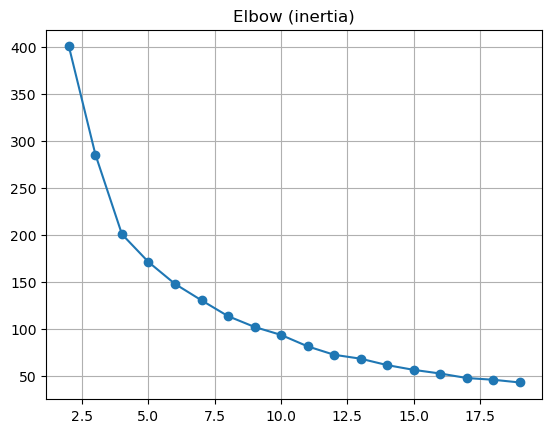

In [151]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# use annualized mean and vol as features
ann_ret = ret_train.mean()*252
ann_vol = ret_train.std()*np.sqrt(252)

feat_train = pd.DataFrame({'Returns': ann_ret, 'Volatility': ann_vol}).dropna()
X_train = feat_train.values

# scale 
Z_train = StandardScaler().fit_transform(X_train)

# Use elbow method on inertia (WCSS) ---
inertias = []
ks = range(2, 20)
for k in ks:
    km = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    km.fit(Z_train)
    inertias.append(km.inertia_)

plt.plot(ks, inertias, marker='o')
plt.grid(True)
plt.title('Elbow (inertia)')


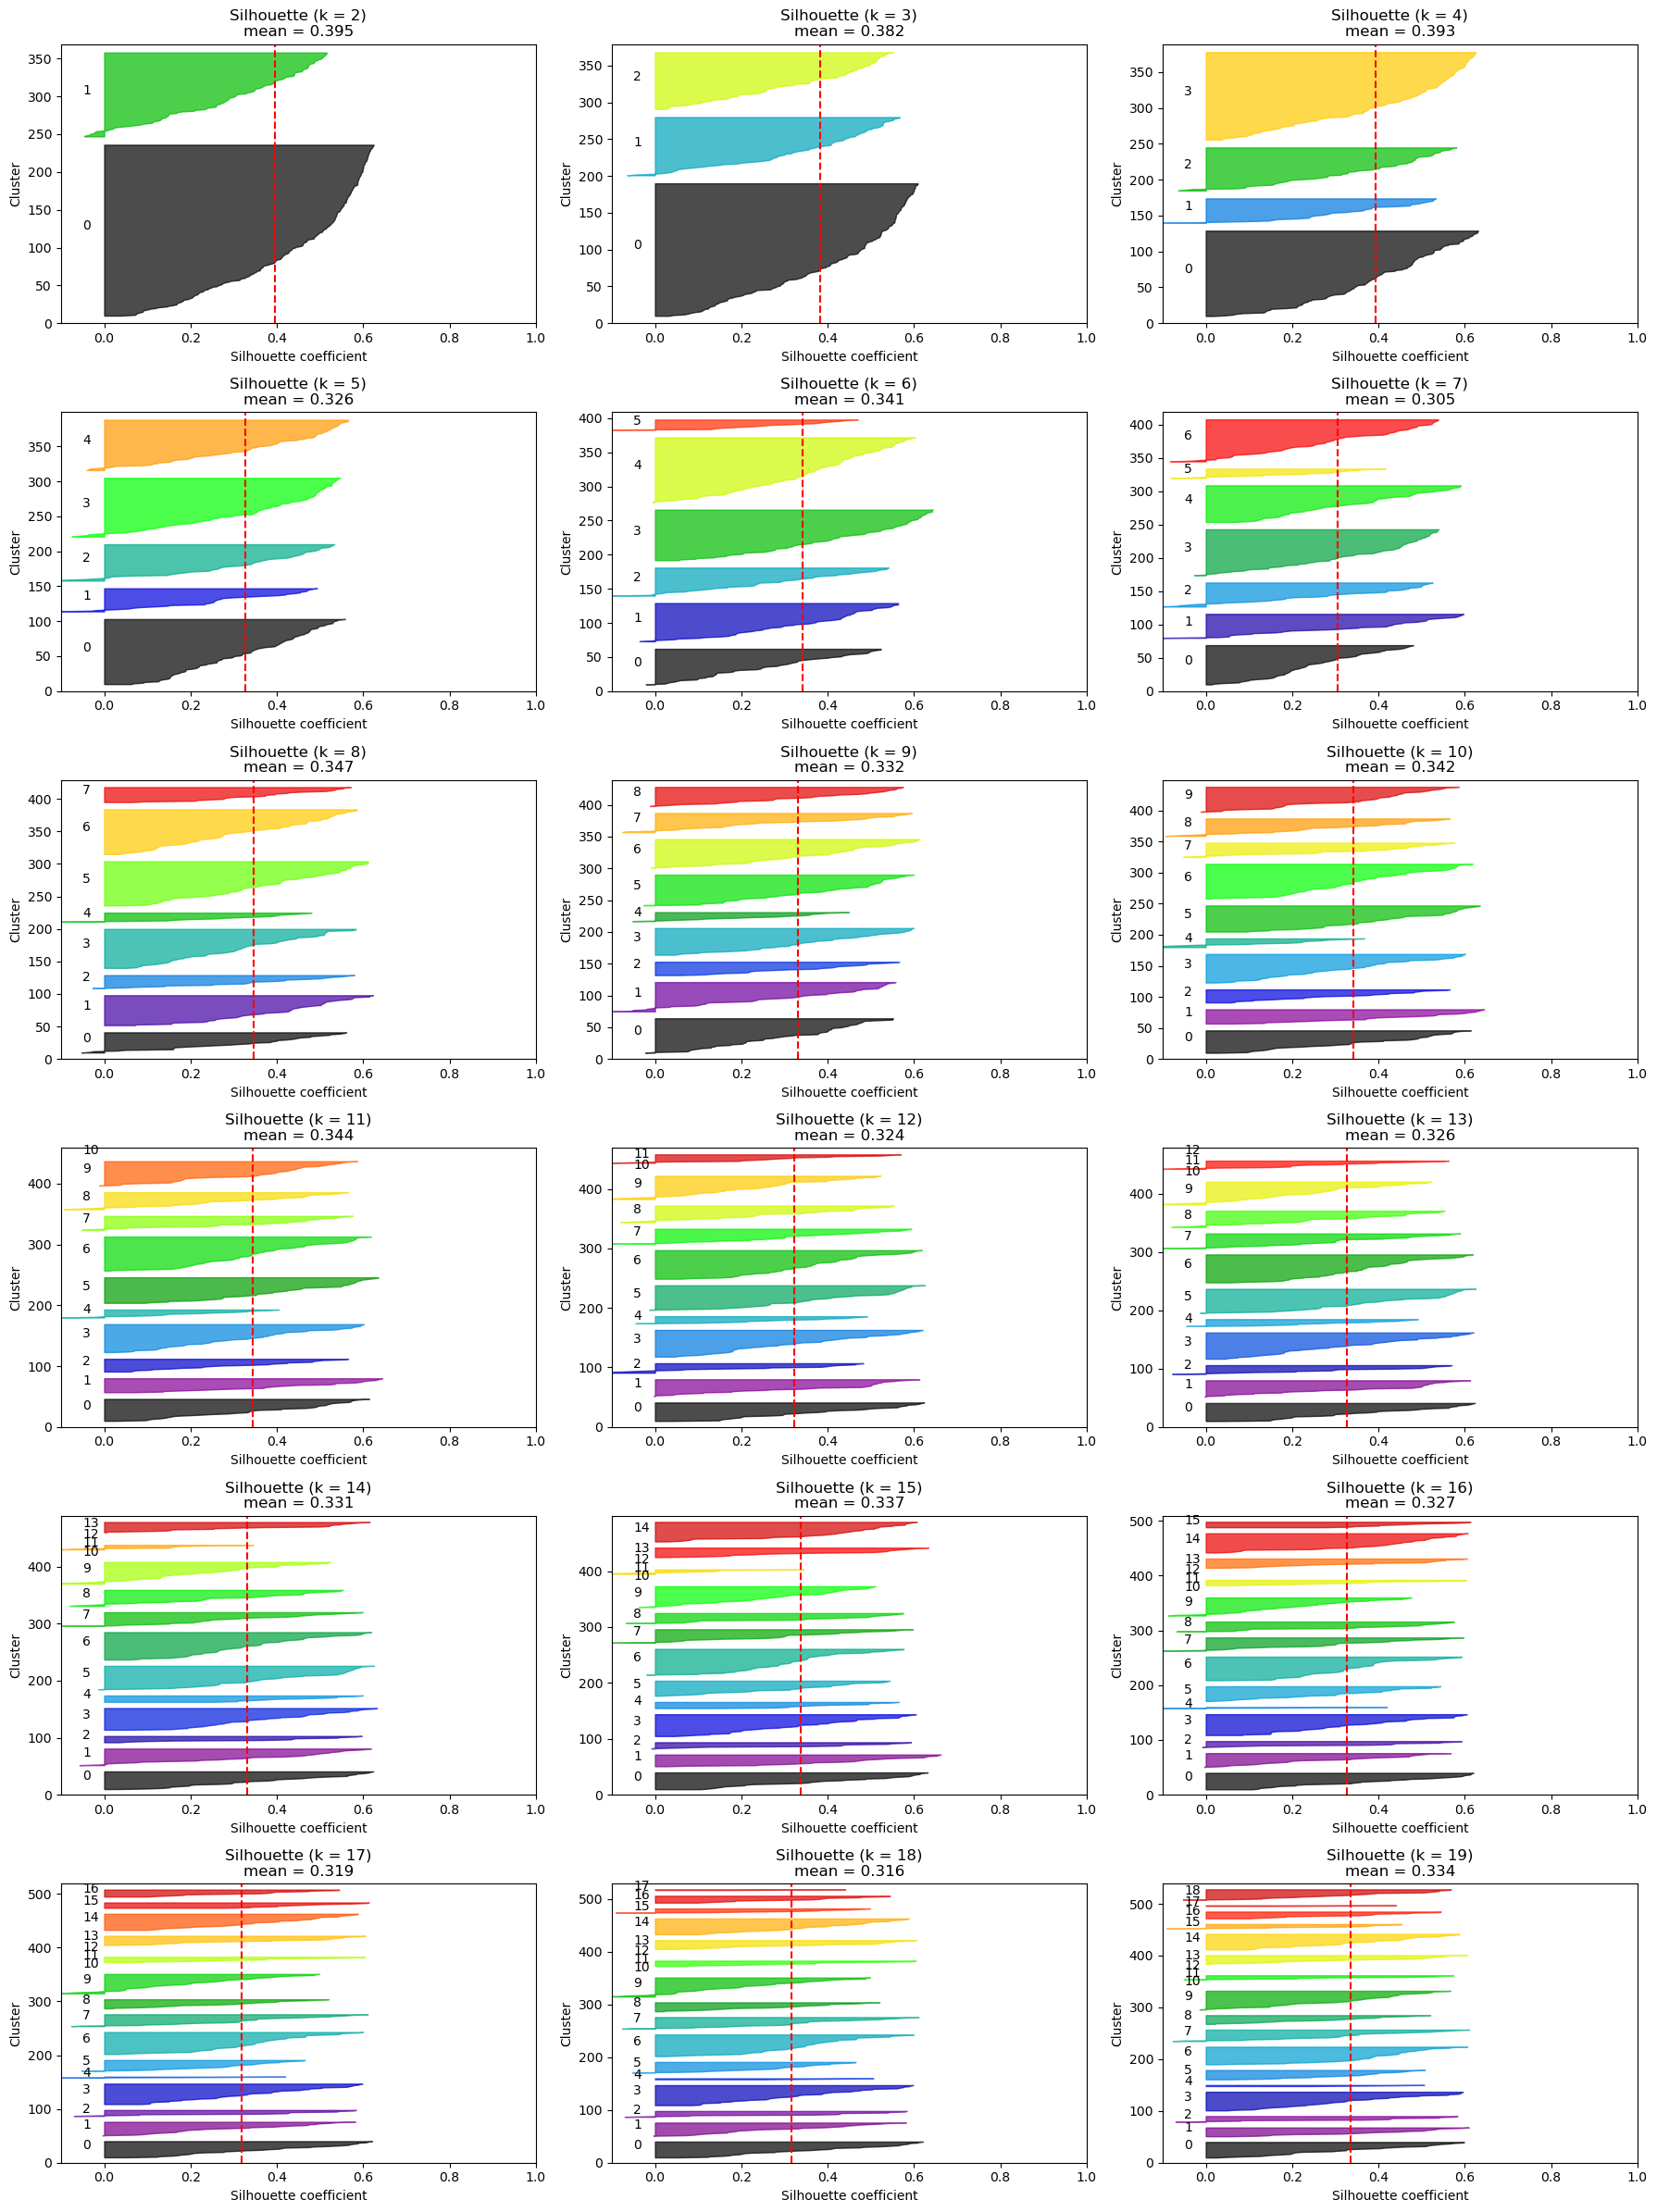

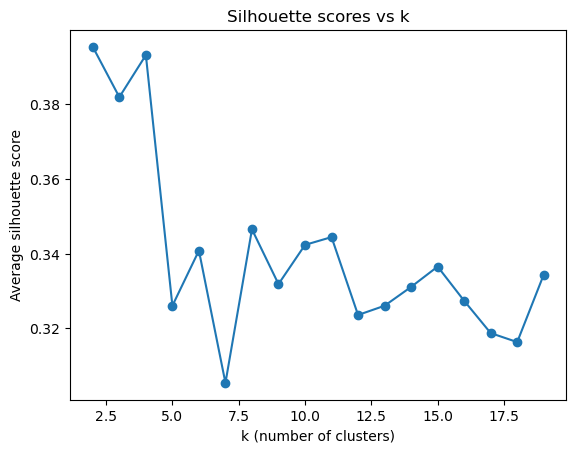

In [152]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

def silhouette_plot(X, k_list, n_cols=2, figsize_per_plot=(6, 4)):
    """
    Plot silhouette plots for a list of k values in a subplot grid.

    Parameters:
        X : 2d array-like, shape (n_samples, n_features)
        k_list : list of integers, the k's to evaluate (must be ≥ 2)
        n_cols : number of columns in subplot grid
        figsize_per_plot : tuple, (width, height) for each subplot
    """
    n_plots = len(k_list)
    n_rows = (n_plots + n_cols - 1) // n_cols  # ceiling division

    # Figure size: each subplot gets figsize_per_plot
    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(figsize_per_plot[0] * n_cols,
                                      figsize_per_plot[1] * n_rows),
                             squeeze=False)

    # Flatten axes for easier iteration
    axes_flat = axes.flatten()

    sil_means = {}

    for idx, k in enumerate(k_list):
        ax = axes_flat[idx]
        # Fit and label
        kmeans = KMeans(n_clusters=k, random_state=42, n_init="auto")
        labels = kmeans.fit_predict(X)

        # Compute average silhouette
        sil_avg = silhouette_score(X, labels)
        sil_means[k] = sil_avg

        # Compute sample silhouette values
        sil_vals = silhouette_samples(X, labels)

        # Plot silhouette for each cluster
        ax.set_xlim([-0.1, 1])
        ax.set_ylim([0, len(X) + (k + 1) * 10])

        y_lower = 10
        for cluster in range(k):
            cluster_vals = sil_vals[labels == cluster]
            cluster_vals.sort()
            size = cluster_vals.shape[0]
            y_upper = y_lower + size

            color = cm.nipy_spectral(cluster / k)
            ax.fill_betweenx(np.arange(y_lower, y_upper),
                             0, cluster_vals,
                             facecolor=color, edgecolor=color, alpha=0.7)

            ax.text(-0.05, y_lower + 0.5 * size, str(cluster))
            y_lower = y_upper + 10

        ax.axvline(x=sil_avg, color="red", linestyle="--")
        ax.set_title(f"Silhouette (k = {k})\nmean = {sil_avg:.3f}")
        ax.set_xlabel("Silhouette coefficient")
        ax.set_ylabel("Cluster")

    # Hide unused subplots (if any)
    for j in range(n_plots, n_rows * n_cols):
        fig.delaxes(axes_flat[j])

    fig.tight_layout()
    plt.show()

    # Optionally return the mean silhouette dict
    return sil_means

# Example
k_list = list(range(2, 20))
sil_means = silhouette_plot(Z_train, k_list, n_cols=3)

sil_means
# Example: test for different k
sil_scores = []

for cluster, mean_score in sil_means.items():
    sil_scores.append(mean_score)


# plot average sil score over k
plt.plot(k_list, sil_scores, marker='o')
plt.xlabel("k (number of clusters)")
plt.ylabel("Average silhouette score")
plt.title("Silhouette scores vs k")
plt.show()


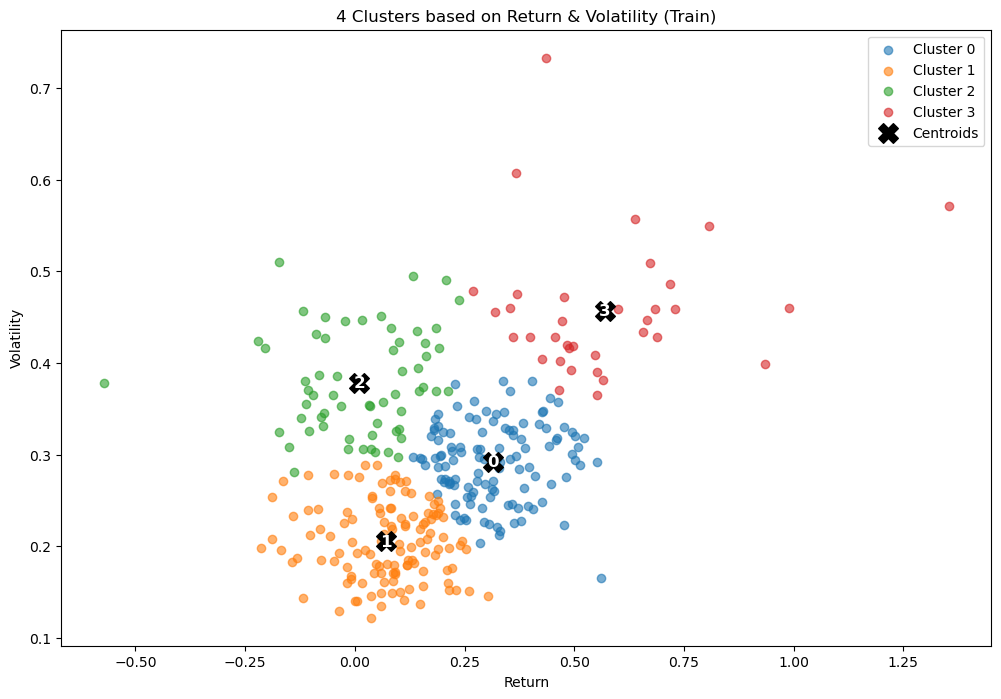

In [180]:
# pick K and fit final model 
K = 4
km = KMeans(n_clusters=K, init='k-means++', n_init=25, random_state=0)
labels = km.fit_predict(Z_train)

clusters_df = feat_train.assign(Cluster=labels).reset_index().rename(columns={'index':'Ticker'})

# Compute cluster centers in terms of Returns & Volatility
centers = (
    clusters_df.groupby("Cluster")[["Returns", "Volatility"]]
    .mean()
    .reset_index()
)

plt.figure(figsize=(12, 8))

# plot each cluster separately
for clust in sorted(clusters_df["Cluster"].unique()):
    sub = clusters_df[clusters_df["Cluster"] == clust]
    plt.scatter(sub["Returns"], sub["Volatility"], label=f"Cluster {clust}", alpha=0.6)

# plot centroids
plt.scatter(centers["Returns"], centers["Volatility"],
            marker='X', s=200, c='black', label="Centroids")

# label centroid coordinates
for _, row in centers.iterrows():
    plt.text(row["Returns"], row["Volatility"],
             f"{int(row['Cluster'])}",
             fontsize=12, fontweight='bold',
             ha='center', va='center', color='white')

plt.title("4 Clusters based on Return & Volatility (Train)")
plt.xlabel("Return")
plt.ylabel("Volatility")
plt.legend()
plt.show()


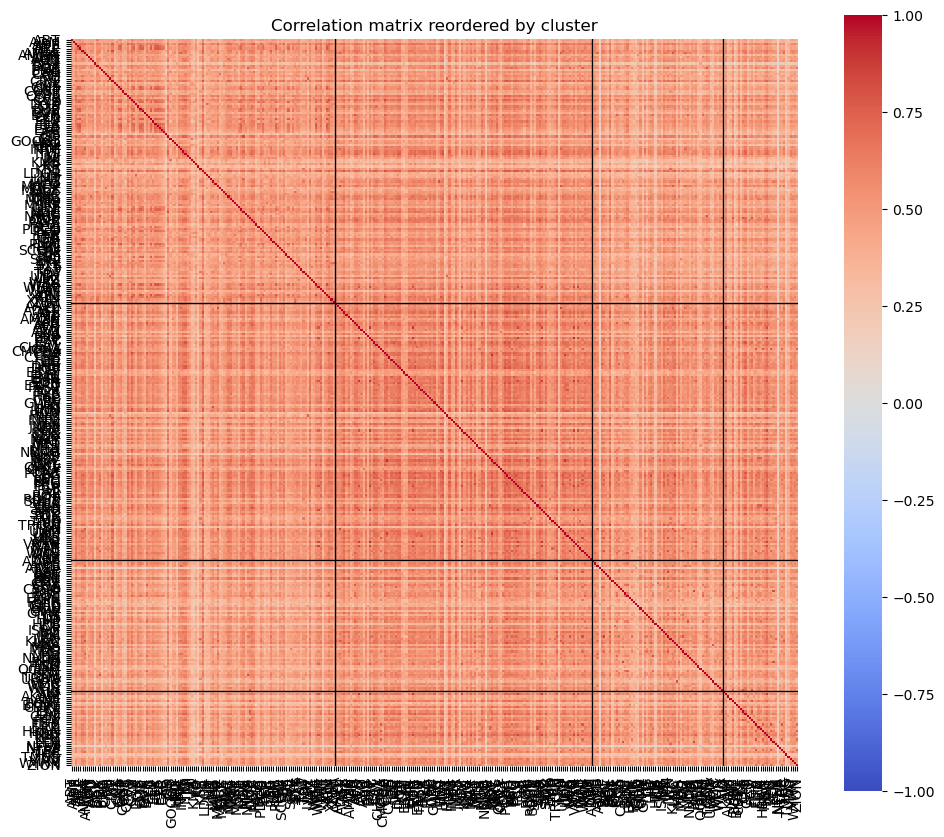

In [181]:
import seaborn as sns

# Get heatmap of reindex correlation
corr_train = ret_train.corr()

def plot_corr_by_cluster(corr_df, clusters_df, cluster_col="Cluster"):
    # Determine ordering
    cluster_order = (
        clusters_df.groupby(cluster_col)
        .size()
        .sort_values(ascending=False)
        .index
    )
    ticker_order = []
    for cl in cluster_order:
        tlist = clusters_df.loc[clusters_df[cluster_col] == cl, "Ticker"].tolist()
        ticker_order.extend(sorted(tlist))
    
    # Reindex
    corr_reord = corr_df.loc[ticker_order, ticker_order]
    
    # Plot
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(
        corr_reord,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        center=0,
        xticklabels=True,
        yticklabels=True,
        square=True,
        cbar_kws={"shrink": 0.8},
    )

    #Draw cluster separators
    import numpy as np
    cluster_sizes = [ (clusters_df["Cluster"] == cl).sum() for cl in cluster_order ]
    cum = np.cumsum(cluster_sizes)
    for pos in cum[:-1]:
        ax.axhline(pos, color='black', linewidth=1)
        ax.axvline(pos, color='black', linewidth=1)

    plt.title("Correlation matrix reordered by cluster")
    plt.tight_layout()
    plt.show()

# Call it
plot_corr_by_cluster(corr_train, clusters_df)


##### Remarks
- Not surprisingly, our clusters formed from simple ret, vol pair does not seem to do a good job forming clusters, as seen from the re-indexed correlation heatmap. If they were good clusters, then we should see a darker region along the diagonal versus the off diagonals.

#### Evaluating Clusters Formed

One of the main ways we would verify that the clusters are actually robust is to track the clusters over time. We will keep track of the ARI (Adjusted Rand Index) to do this.

In [ ]:
# Get feature history data by using a rolling window. THis will be later used as input for testing robustness

def compute_feature_history(returns_df, lookback_return=252, lookback_vol=252, formation_dates=None):
    """
    Parameters:
        returns_df: 
            DataFrame, index = trading dates, columns = assets, values = simple returns (e.g. daily pct-change)
        
        formation_dates: 
            optional list of dates at which to compute features;
            if None, uses all dates from max(lookback) onward
    Returns:
        feature_hist: dict mapping formation_date -> DataFrame (assets × features)
    """
    # Step 1: make sure returns aligned, no missing leading zeros
    # Step 2: Optionally forward-fill / drop NaNs in returns
    # Step 3: For each formation date t, compute features using past returns up to t-1
    
    # define the candidate formation dates
    if formation_dates is None:
        formation_dates = returns_df.index[max(lookback_return, lookback_vol):]
    feature_hist = {}
    
    for t in formation_dates:
        # define the lookback window 
        idx = returns_df.index.get_loc(t)
        if idx < max(lookback_return, lookback_vol):
            continue  # not enough history
        window_returns = returns_df.iloc[idx - lookback_vol : idx]  # vol window
        window_ret_for_ret = returns_df.iloc[idx - lookback_return : idx]  # return window
        
        # compute per-asset return feature 
        mean_ret = window_ret_for_ret.mean(axis = 0) * 252
        
        # compute per-asset volatility
        vol = window_returns.std(axis=0) * np.sqrt(252) 
        
        
        # combine into a DataFrame
        df_feat = pd.DataFrame({
            'Return': mean_ret,
            'Volatility': vol,
        })
        # drop assets with NaN / insufficient data
        df_feat = df_feat.dropna(how='any')
        
        feature_hist[t] = df_feat
    
    return feature_hist


feature_hist = compute_feature_history(ret, lookback_return=252, lookback_vol=252)

# check one formation date
t0 = sorted(feature_hist.keys())[0]
print("At date", t0)
print(feature_hist[t0].head())



At date 2011-01-04 00:00:00
        Return  Volatility
A     0.338446    0.306989
AAPL  0.467684    0.267911
ABT  -0.119824    0.142895
ADBE -0.096067    0.380552
ADI   0.223725    0.293485


<Axes: >

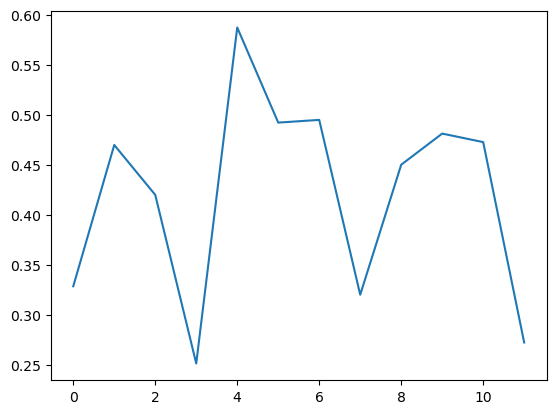

In [189]:
# Use feature history dataframe to check for robustness across time

from sklearn.metrics import adjusted_rand_score

def cluster_labels(features_df, n_clusters):
    """
    Given feature DataFrame (assets x features), return clustering labels Series.
    """
    km = KMeans(n_clusters=n_clusters, n_init=25, random_state=42)
    lab = km.fit_predict(features_df.values)
    return pd.Series(lab, index=features_df.index)

def rolling_persistence(feature_hist, window, step, n_clusters):
    """
    Parameters:
        feature_hist: 
            dict mapping date → DataFrame of features (assets × features) at that date
        window: 
            number of periods (dates) in each window
        step: 
            how many periods to move forward each iteration
        Returns: 
            list of (t, ARI between window t and t+step)
    """
    dates = sorted(feature_hist.keys())
    results = []
    for i in range(0, len(dates) - window - step + 1, step):
        t0 = dates[i + window - 1]
        t1 = dates[i + window - 1 + step]
        X0 = feature_hist[t0]
        X1 = feature_hist[t1]

        # cluster them
        l0 = cluster_labels(X0, n_clusters)
        l1 = cluster_labels(X1, n_clusters)

        
        # align tickers
        common = l0.index.intersection(l1.index)
        ari = adjusted_rand_score(l0.loc[common], l1.loc[common])
        results.append({'t0': t0, 't1': t1, 'ARI': ari, 'n_common': len(common)})
    return pd.DataFrame(results)

# Example usage:
df = rolling_persistence(feature_hist, window=1, step=20, n_clusters=4)
df['ARI'].plot()


##### Remarks
- ARI is volatile across time, indicating that our current clustering method may not be robust to treat the clusters as "true" long term clusters.

### DBSCAN
K-means is a distance based clustering method that forms clusters based on Euclidean Distance. However, our data shape may not be convex. DBSCAN is a density-based clustering algorithm that basically looks for dense regions within our data to form clusters

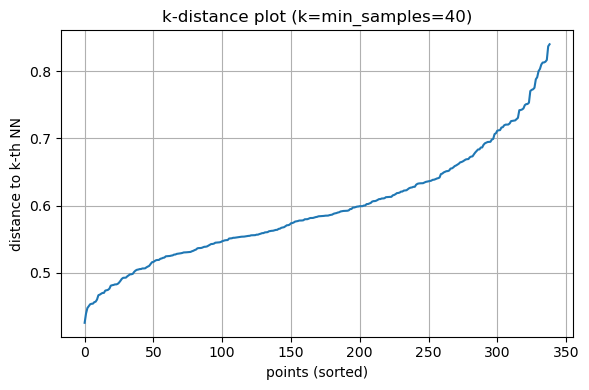

In [215]:
from scipy.stats import mstats
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, OPTICS


train_days = 20
base_date = pd.to_datetime(base_date)

# last 60 trading days strictly up to base_date (inclusive if present)
ret_train = ret.loc[:base_date].tail(train_days).copy()

def winsorize_df(df, lower=0.01, upper=0.99):
    """
    Winsorize each column independently across rows (time axis here).
    """
    q_low  = df.quantile(lower)
    q_high = df.quantile(upper)
    return df.clip(lower=q_low, upper=q_high, axis=1)

ret_train = winsorize_df(ret_train, 0.01, 0.99)  # 1%/99% clip


# Build 60-day feature matrix
feature_train = ret_train.T.copy()
feature_train.columns = [f"d_{i:02d}" for i in range(feature_train.shape[1])]

# L2-normalize each row for cosine distance (shape emphasis)
X = normalize(feature_train.values, norm='l2', axis=1)

# DBSCAN: choose eps via k-distance elbow 
def k_distances(X, k=10, metric='cosine'):
    """
    Return sorted distances to the k-th nearest neighbor (per point).
    For DBSCAN: choose min_samples=k, then inspect the elbow of this curve.
    """
    nbrs = NearestNeighbors(n_neighbors=k, metric=metric).fit(X)
    distances, _ = nbrs.kneighbors(X)
    kth = distances[:, -1]  # distance to k-th neighbor
    return np.sort(kth)

# heuristic for min_samples (D = 60)
D = X.shape[1]
min_samples = max(5, min(2*D, feature_train.shape[0]//3))  # start point; adjust as needed

# plot k-distance curve to eyeball ε
kdist = k_distances(X, k=min_samples, metric='cosine')
plt.figure(figsize=(6,4))
plt.plot(kdist)
plt.title(f'k-distance plot (k=min_samples={min_samples})')
plt.xlabel('points (sorted)'); plt.ylabel('distance to k-th NN'); plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# pick 0.8 as eps
eps = 0.6

# Fit DBSCAN (cosine distance)
dbs = DBSCAN(eps=eps, min_samples=min_samples, metric='cosine', n_jobs=-1)
labels_db = pd.Series(dbs.fit_predict(X), index=feature_train.index, name='Cluster')

# Reordered correlation heatmap by cluster 
corr_train = ret_train.corr('spearman')  # or Spearman for robustness: ret_train.corr('spearman')

def plot_corr_by_cluster(corr_df, clusters_df, cluster_col="Cluster"):
    # Determine ordering
    cluster_order = (
        clusters_df.groupby(cluster_col)
        .size()
        .sort_values(ascending=False)
        .index
    )
    ticker_order = []
    for cl in cluster_order:
        tlist = clusters_df.loc[clusters_df[cluster_col] == cl, "Ticker"].tolist()
        ticker_order.extend(sorted(tlist))
    
    # Reindex
    corr_reord = corr_df.loc[ticker_order, ticker_order]
    
    # Plot
    plt.figure(figsize=(10, 10))
    ax = sns.heatmap(
        corr_reord,
        cmap="coolwarm",
        vmin=-1, vmax=1,
        center=0,
        xticklabels=True,
        yticklabels=True,
        square=True,
        cbar_kws={"shrink": 0.8},
    )

    # Draw cluster separators
    cluster_sizes = [ (clusters_df["Cluster"] == cl).sum() for cl in cluster_order ]
    cum = np.cumsum(cluster_sizes)
    for pos in cum[:-1]:
        ax.axhline(pos, color='black', linewidth=1)
        ax.axvline(pos, color='black', linewidth=1)

    plt.title("Correlation matrix reordered by cluster")
    plt.tight_layout()
    plt.show()

# plot
clusters_df = pd.DataFrame({'Ticker': labels_db.index, 'Cluster': labels_db.values})

# Example excluding noise from the heatmap:
plot_corr_by_cluster(corr_train, clusters_df[clusters_df.Cluster!=-1])

In [198]:
clusters_df

,Ticker,Cluster
0,A,0
1,AAPL,0
2,ABT,0
3,ADBE,0
4,ADI,0
...,...,...
334,XRAY,0
335,XRX,0
336,YUM,0
337,ZBH,0


In [ ]:
# Build clusters_df and draw (you may exclude noise = -1 if you prefer)
clusters_df = pd.DataFrame({'Ticker': labels_db.index, 'Cluster': labels_db.values})
# Example excluding noise from the heatmap:
plot_corr_by_cluster(corr_train, clusters_df[clusters_df.Cluster!=-1])

# ==== 5) Rolling robustness for DBSCAN via ARI ====
# Build rolling feature history of 60-day vectors
def compute_feature_history_vec(returns_df, lookback_days=60, formation_dates=None,
                                winsor=(0.01,0.99), l2norm=True):
    if formation_dates is None:
        formation_dates = returns_df.index[lookback_days:]
    feat_hist = {}
    for t in formation_dates:
        idx = returns_df.index.get_loc(t)
        W = returns_df.iloc[idx-lookback_days:idx]  # strictly past window
        if W.shape[0] < lookback_days: 
            continue
        W = winsorize_df(W, winsor[0], winsor[1])
        F = W.T.dropna(how='any')
        if l2norm:
            F = pd.DataFrame(normalize(F.values, axis=1), index=F.index, columns=F.columns)
        feat_hist[t] = F
    return feat_hist

feature_hist = compute_feature_history_vec(ret, lookback_days=60)

def eps_from_kdist(X, min_samples, metric='cosine', q=0.90):
    kd = k_distances(X, k=min_samples, metric=metric)
    return float(np.quantile(kd, q))

def dbscan_labels_from_features(F, min_samples, eps=None, metric='cosine', eps_quantile=0.90):
    X = F.values
    if eps is None:
        eps = eps_from_kdist(X, min_samples, metric=metric, q=eps_quantile)
    lab = DBSCAN(eps=eps, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X)
    return pd.Series(lab, index=F.index)

def rolling_persistence_dbscan(feature_hist, min_samples, step=20, use_fixed_eps=True,
                               eps_quantile=0.90, ignore_noise=False, metric='cosine'):
    """
    Compare labels at t and t+step using ARI.
    If use_fixed_eps=True, calibrate eps at first window and reuse; else re-calibrate each time.
    """
    dates = sorted(feature_hist.keys())
    out = []
    fixed_eps = None
    for i in range(0, len(dates)-step):
        t0, t1 = dates[i], dates[i+step]
        F0, F1 = feature_hist[t0], feature_hist[t1]
        X0, X1 = F0.values, F1.values

        if use_fixed_eps and fixed_eps is None:
            fixed_eps = eps_from_kdist(X0, min_samples, metric=metric, q=eps_quantile)

        eps0 = fixed_eps if use_fixed_eps else eps_from_kdist(X0, min_samples, metric, eps_quantile)
        eps1 = fixed_eps if use_fixed_eps else eps_from_kdist(X1, min_samples, metric, eps_quantile)

        l0 = DBSCAN(eps=eps0, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X0)
        l1 = DBSCAN(eps=eps1, min_samples=min_samples, metric=metric, n_jobs=-1).fit_predict(X1)
        s0 = pd.Series(l0, index=F0.index)
        s1 = pd.Series(l1, index=F1.index)

        common = s0.index.intersection(s1.index)
        if ignore_noise:
            keep = (s0.loc[common] != -1) & (s1.loc[common] != -1)
            common = common[keep]
        ari = adjusted_rand_score(s0.loc[common], s1.loc[common]) if len(common)>1 else np.nan
        out.append({'t0': t0, 't1': t1, 'ARI': ari, 'n_common': int(len(common)),
                    'eps0': eps0, 'eps1': eps1})
    return pd.DataFrame(out)

# Example: robustness curve for DBSCAN (core-only ARI)
rob_db = rolling_persistence_dbscan(feature_hist, min_samples=min_samples, step=20,
                                    use_fixed_eps=True, ignore_noise=True)
rob_db.set_index('t1')['ARI'].plot(title='DBSCAN rolling ARI (core-only)'); plt.grid(True); plt.show()

# ==== 6) OPTICS version (no global eps; use xi on reachability) ====
def optics_labels_from_features(F, min_samples, metric='cosine', xi=0.05):
    """
    Use Xi method to extract variable-density clusters (recommended).
    """
    model = OPTICS(min_samples=min_samples, metric=metric, cluster_method='xi', xi=xi, n_jobs=-1)
    lab = model.fit_predict(F.values)
    return pd.Series(lab, index=F.index), model

# Fit on current training window
labels_opt, optics_model = optics_labels_from_features(feature_train, min_samples, xi=0.05)
clusters_df_opt = pd.DataFrame({'Ticker': labels_opt.index, 'Cluster': labels_opt.values})
plot_corr_by_cluster(corr_train, clusters_df_opt[clusters_df_opt.Cluster!=-1])

# Optional: visualize reachability (diagnostic)
plt.figure(figsize=(8,3))
plt.plot(optics_model.reachability_[optics_model.ordering_])
plt.title('OPTICS reachability plot (ordered)'); plt.xlabel('ordered points'); plt.ylabel('reachability')
plt.grid(True); plt.tight_layout(); plt.show()

# Rolling robustness for OPTICS
def rolling_persistence_optics(feature_hist, min_samples, step=20, xi=0.05, ignore_noise=False, metric='cosine'):
    dates = sorted(feature_hist.keys())
    out = []
    for i in range(0, len(dates)-step):
        t0, t1 = dates[i], dates[i+step]
        F0, F1 = feature_hist[t0], feature_hist[t1]
        l0, _ = optics_labels_from_features(F0, min_samples, metric, xi)
        l1, _ = optics_labels_from_features(F1, min_samples, metric, xi)
        common = l0.index.intersection(l1.index)
        if ignore_noise:
            keep = (l0.loc[common] != -1) & (l1.loc[common] != -1)
            common = common[keep]
        ari = adjusted_rand_score(l0.loc[common], l1.loc[common]) if len(common)>1 else np.nan
        out.append({'t0': t0, 't1': t1, 'ARI': ari, 'n_common': int(len(common))})
    return pd.DataFrame(out)

rob_opt = rolling_persistence_optics(feature_hist, min_samples=min_samples, step=20, xi=0.05, ignore_noise=True)
rob_opt.set_index('t1')['ARI'].plot(title='OPTICS rolling ARI (core-only)'); plt.grid(True); plt.show()


## Evaluation: How to Determine if our Clusters are any good?